### **Student Information**  

Gideon Shahar  

Noy Rahmani  
311124416

In [1]:
# imports

from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt


data_folder = Path("./data")

In [2]:
# set matplotlib to show images nicely
%matplotlib inline
plt.rcParams['figure.figsize'] = (4, 4)

### Question 3 — Coin Detection in Mario Maps
#### You are given several Mario map images that contain multiple coins scattered in the scene. Your task is to detect these coins using template matching techniques.


1. **Smart Coin Cropping (Pre‑processing)**  
    - Select one clear coin from the map.  
    - Crop it smartly and manually (tight bounding box, centered, minimal background).  
    - You may apply:  
        - Contrast enhancement  
        - Histogram equalization  
        - Smoothing or sharpening filters  
    - Explain why your cropping is effective and how it improves template matching.


In [ ]:
imname = "mario-bonusarea-a.png"
img = cv2.imread(data_folder / imname)

coin_roi = cv2.selectROI("Select Coin and press ENTER", img, False)
coin_img = img[coin_roi[1]:coin_roi[3], coin_roi[0]: coin_roi[0]+coin_roi[2]]
cv2.destroyAllWindows()
cv2.imwrite(data_folder / 'coin.png', coin_img)

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Select Coin and Press ENTER' in function 'cvDestroyWindow'


2. **Plot the Histogram**  
    - Use matplotlib.pyplot to plot:  
        - x-axis: pixel intensity (0–255)  
        - y-axis: number of pixels  
        - Label the axes clearly.  
    - Add a title such as "Histogram of the Original Image".

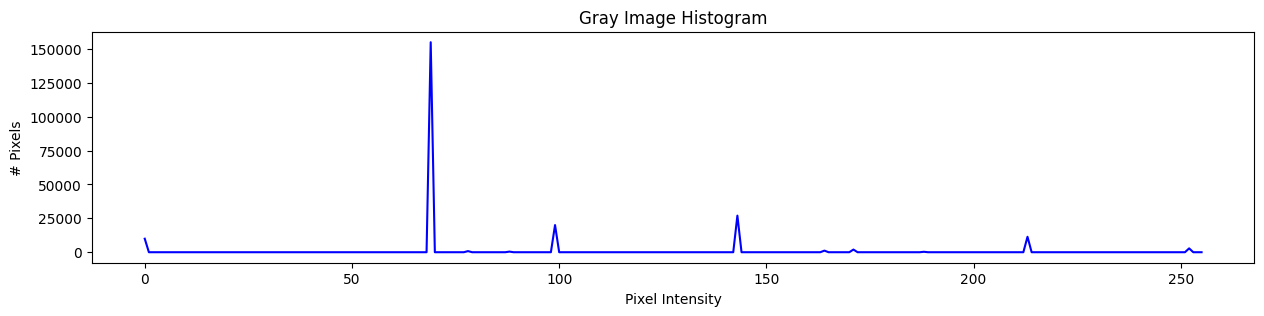

In [40]:
# numpy histogram
np_hist = np.bincount(img.flatten(), minlength=256)

# cv2 hist
cv2_hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()

plt.figure(figsize=(15, 3))
plt.plot(np_hist, color='b')
plt.title('Gray Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels')
plt.show()



3. **Interpretation Questions Answer:** 
    - What does it mean when the histogram is concentrated on the left side?  
    - What does it mean when the histogram is stretched across all values?  
    - What do high peaks represent?

- It means that the better part of the picture have low intensity (i.e. medium-dark gray and not bright whitish gray)  
- That the brightness intensity is uniformly distribute accross all pixels.   
- The dominant intensity values in the image. Above, we can see that the most dominant shade is value ~70 with 150K pixels - more then half of the image pixels.  
We have about 4-5 smaller peaks, with less than 25K pixels per value.

4. **Histogram Equalization**  
    - Apply histogram equalization to the grayscale image.  
    - You may implement it manually (CDF method) or use OpenCV: cv2.equalizeHist().  
    - Display:  
        - Original image  
        - Equalized image  
        - Original histogram  
        - Equalized histogram  
    - Explain how equalization changes the distribution of pixel intensities.

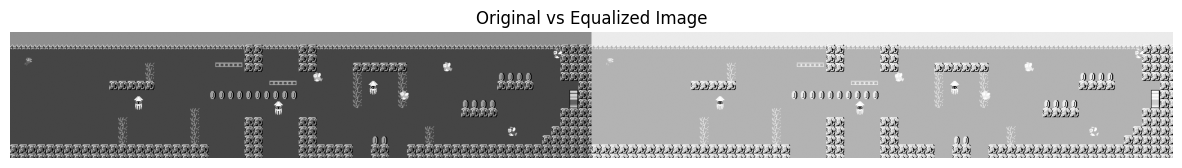

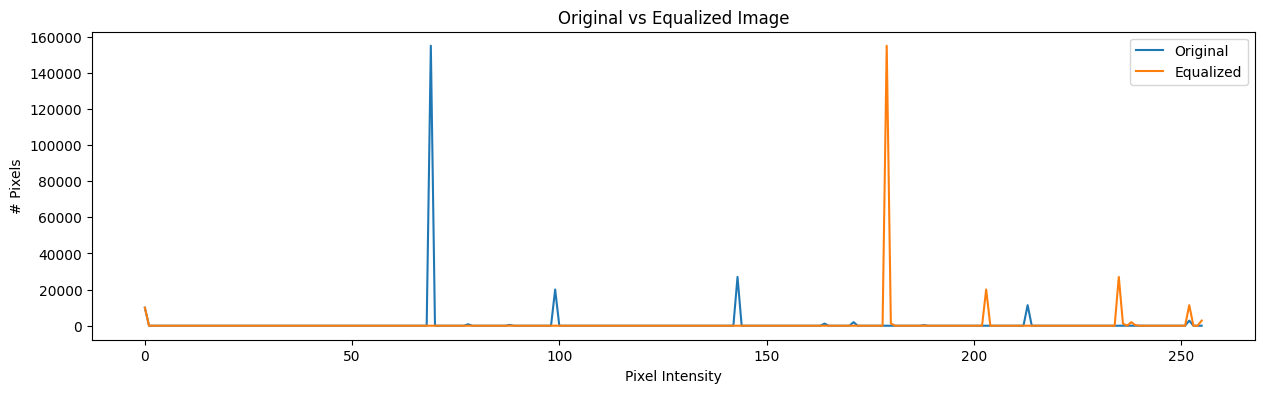

In [58]:
equ = cv2.equalizeHist(img)
imgs_stack = np.hstack((img, equ))

org_hist = np.bincount(img.flatten(), minlength=256)
equ_hist = np.bincount(equ.flatten(), minlength=256)

plt.figure(figsize=(15, 6))
plt.imshow(imgs_stack, cmap='gray')  
plt.title("Original vs Equalized Image")
plt.axis('off')  

plt.figure(figsize=(15, 4))
plt.plot(org_hist, label='Original')
plt.plot(equ_hist, label='Equalized')  
plt.title("Original vs Equalized Image")
plt.legend()
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels')
plt.show()

Histogram Equalization tries to uniformly spread the intensity distribution of the image.  
Using the original histogram CDF and apply a transformation on it to make it more linear - meaning the new histogram is more speard out and less clustered.  
After this process pixel intensities occupy the entrie range, peakes are reduced, contrast increases, dark pixels get brighter, etc.

5. **Comparison**  
    - Write a short comparison:  
        - When does histogram equalization improve images?  
        - When does it create noise or distort colors?  
        - Why is it often used on medical or low-light images?

- When the image has low contrast, when the image is very dark and brightness could help figure out details, or when the image histogram has few large peaks.  
- if the image has good contrast, or the histogram has many small peaks equalizing could cause noise. On RGB images, equalizing on each channel independently can harm shades and colors.
- These images typically have low contrast, resulting many details could be hidden. By applying equalization wecanenhance these details.